In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader.data as web
import FinanceDataReader as fdr
from sklearn import neighbors,svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import FinanceDataReader as fdr
import mglearn
from sklearn.preprocessing import MinMaxScaler
import sklearn

#성과 평가
from sklearn.metrics import confusion_matrix #오차행렬
from sklearn.metrics import accuracy_score #정확도
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

setlen=2000

#분류모델
from sklearn.ensemble import GradientBoostingClassifier
   # 3중 분류


In [10]:
#특성 추가 ------------------------------------------
    #이동평균선
def get_MA(df):
    MA_10=df["Close"].rolling(10).mean()
    MA_60=df["Close"].rolling(60).mean()
    df=df.assign(MA_10=MA_10,MA_60=MA_60).dropna()
    
    return df

    
    #스토캐스틱
def get_stochastic(df, n=15, m=5, t=3):
    # n일중 최고가
    ndays_high = df.High.rolling(window=n, min_periods=1).max()
    # n일중 최저가
    ndays_low = df.Low.rolling(window=n, min_periods=1).min()
 
    # Fast%K 계산
    kdj_k = ((df.Close - ndays_low) / (ndays_high - ndays_low))*100
    # Fast%D (=Slow%K) 계산
    kdj_d = kdj_k.ewm(span=m).mean()
    # Slow%D 계산
    kdj_j = kdj_d.ewm(span=t).mean()
 
    # dataframe에 컬럼 추가
    df = df.assign(kdj_k=kdj_k, kdj_d=kdj_d, kdj_j=kdj_j).dropna()
    
    return df
   
    #시간
def get_time(df):
    time=np.linspace(0,10,len(df),endpoint=False).reshape(-1,1)
    df=df.assign(time=time)
    
    return df

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


ValueError: Unknown label type: 'unknown'

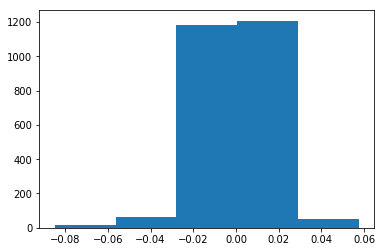

In [62]:


KS=fdr.DataReader("SSEC","2009-01-01","2019-08-14")

#특성 추가---
KS=get_MA(KS)
KS=get_stochastic(KS)
KS=get_time(KS)

X=KS
#--------

# 3중 분류를 위한 종가 스케일 조정 ---------------
hist_data = plt.hist(KS['Change'],bins = 5)
df = pd.DataFrame(index = KS.index, columns = ['Y'])

initial = hist_data[1][0]
num = 0
for i in hist_data[1][1:]:
    df.loc[KS[KS['Change'] > initial][KS['Change'] < i].index] = num
    initial = i
    num += 1
y=df    
#-----------------------------------------


#미래 예측을 위한 시간조정 ------------------- 
y=pd.DataFrame(np.array(y),index=KS.index).shift(-1).dropna()
X=X.loc[y.index]
#----------------------------
y=np.array(y)
setlen=2000
X_train,X_test,y_train,y_test=X[:setlen],X[setlen:],y[:setlen],y[setlen:2521]

reg=neighbors.KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
print("훈련 세트 정확도:{:.3f}".format(reg.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(reg.score(X_test,y_test)))

confusion=confusion_matrix(y_test,reg.predict(X_test))
confusion

In [ ]:

reg=LogisticRegression().fit(X_train,y_train)
print("훈련 세트 정확도:{:.3f}".format(reg.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(reg.score(X_test,y_test)))

confusion=confusion_matrix(y_test,reg.predict(X_test))
confusion

In [58]:
X

(521, 12)

In [63]:
y

array([[3],
       [1],
       [3],
       ...,
       [3],
       [2],
       [3]], dtype=object)

In [60]:
y

,0
Date,
2009-04-03,3
2009-04-07,1
2009-04-08,3
2009-04-09,3
2009-04-10,3
2009-04-13,3
2009-04-14,3
2009-04-15,2
2009-04-16,2
